# Experiments

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#pd.options.display.max_columns = None
#pd.set_option("display.max_colwidth", None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#pd.set_option("display.max_rows", None)
import model.train as train
import model.config as model_config
import utils
import model.dataset.game_matchup as gm
import experiments as exp
import qgrid

## Setup

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Utils functions

In [ ]:
def show_qgrid(df_):
    qgrid_widget = qgrid.show_grid(df_, show_toolbar=True , grid_options={'forceFitColumns': False, 'defaultColumnWidth': 200})
    qgrid_widget

## Load Dataset

In [ ]:
gm_df = gm.load_game_matchup_dataset()

## Experiments

### Setup

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score

exp.exp_results = []

### Dataset

Usando max_split en TimeSeriesSplit permite dividir el dataset por cantidad de filas por lo que vamos a escoger 
solo las temporadas que tiene la misma cantiadad de partidos.


In [ ]:
gm_df.groupby(by="SEASON").count()["GAME_DATE_EST"]

Podemos observar que no todas las temporadas tiene la misma cantidad de partidos esto es debido a la siguientes razones:

- 2011: Los jugadores hicieron una huelga debido a no estar de acuerdo con los salarios de los mismos y el limite salarial de las franquicias.
- 2012: Un partido entre el equipo de Boston e Indiana fue suspedindo el cual despues no fue reprogramado, y al final de la temporada se decidio ya no reprogramarlo debido a qu la clasificacion a playoff ya estaba decidida y no afectaba el resultado.

Por tanto se seleccionaran solo las temporadas a partir del 2013(inclusive).

In [ ]:
df = gm_df[gm_df.SEASON >= 2013]
seasons_size = len(df.SEASON.unique())
seasons = list(df.SEASON.unique())

Prueba de como seran dividido el dataset usando TimeSeriesSplit

In [ ]:
tscv = TimeSeriesSplit(n_splits=seasons_size-1, max_train_size=1230)
X, y = train.X_y_values(df, model_config.X_for_scale, model_config.y_columns[-1:])
print(len(X))
for train_index, test_index in tscv.split(X=X):
    print("dtype: ", type(train_index))
    print("TRAIN:", train_index, "TEST:", test_index)

### Algorithms 

In [ ]:
models = exp.get_models()

### Experiment using 1 season

In [10]:
experiment_name = "1_season"

In [11]:
# TimeSeries Cross validation
train_splits = seasons_size - 1
tscv = TimeSeriesSplit(n_splits=train_splits, max_train_size=1230)
X, y = train.X_y_values(df, model_config.X_for_scale, model_config.y_columns[-1:])
params = (experiment_name, df, models, tscv, train_splits, X, y)
names, results = exp.run_experiment(*params)

Running experiment 1_season
KNN
balanced_accuracy: 0.638266173950692 - 0.012388548927403384
precision: 0.6942680356832144 - 0.017505301008140333
recall: 0.724577598245685 - 0.022356353939272176
f1: 0.6504635805593454 - 0.012338489000434457
roc_auc: 0.638266173950692 - 0.012388548927403384
SVM
balanced_accuracy: 0.7023793333572499 - 0.0205945882026663
precision: 0.7482881939852426 - 0.025285553913787593
recall: 0.7679533131391177 - 0.022664541178818668
f1: 0.7120407248956584 - 0.01941594424828661
roc_auc: 0.7023793333572499 - 0.020594588202666284
KSVM
balanced_accuracy: 0.5 - 0.0
precision: 0.583739837398374 - 0.006442800896311838
recall: 1.0 - 0.0
f1: 0.43033425003538295 - 0.007748156942408034
roc_auc: 0.5 - 0.0
NB
balanced_accuracy: 0.5899128794081088 - 0.054987549636554764
precision: 0.7126896373971718 - 0.07520596704245437
recall: 0.5162363379919036 - 0.32392254012995275
f1: 0.5265329123421841 - 0.12070246623500626
roc_auc: 0.5899128794081089 - 0.05498754963655473
DT
balanced_accura

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
balanced_accuracy: 0.6726206346889972 - 0.017825754462942454
precision: 0.7128152865793476 - 0.028480412547168783
recall: 0.8024131558894148 - 0.045993391514306675
f1: 0.6864779191972626 - 0.015779765383889387
roc_auc: 0.6726206346889972 - 0.017825754462942402
GB
balanced_accuracy: 0.66895461637111 - 0.02055660286971414
precision: 0.7228290184060993 - 0.03343593061076319
recall: 0.7428266108523923 - 0.057610706758488145
f1: 0.6780442804478786 - 0.018209927773185614
roc_auc: 0.66895461637111 - 0.02055660286971409
XGB
balanced_accuracy: 0.6681990980430437 - 0.02724266412295967
precision: 0.7218691716541833 - 0.03603643560577665
recall: 0.7430934493154779 - 0.03730529538888247
f1: 0.6778995161026529 - 0.023135752364255687
roc_auc: 0.6681990980430437 - 0.02724266412295967
LGB
balanced_accuracy: 0.679762546375407 - 0.019984287665001575
precision: 0.731579411813026 - 0.025775272713352716
recall: 0.7436805047203902 - 0.02881858754670766
f1: 0.6891270827853159 - 0.018377332730901755
roc_auc

#### Visualize experiments results

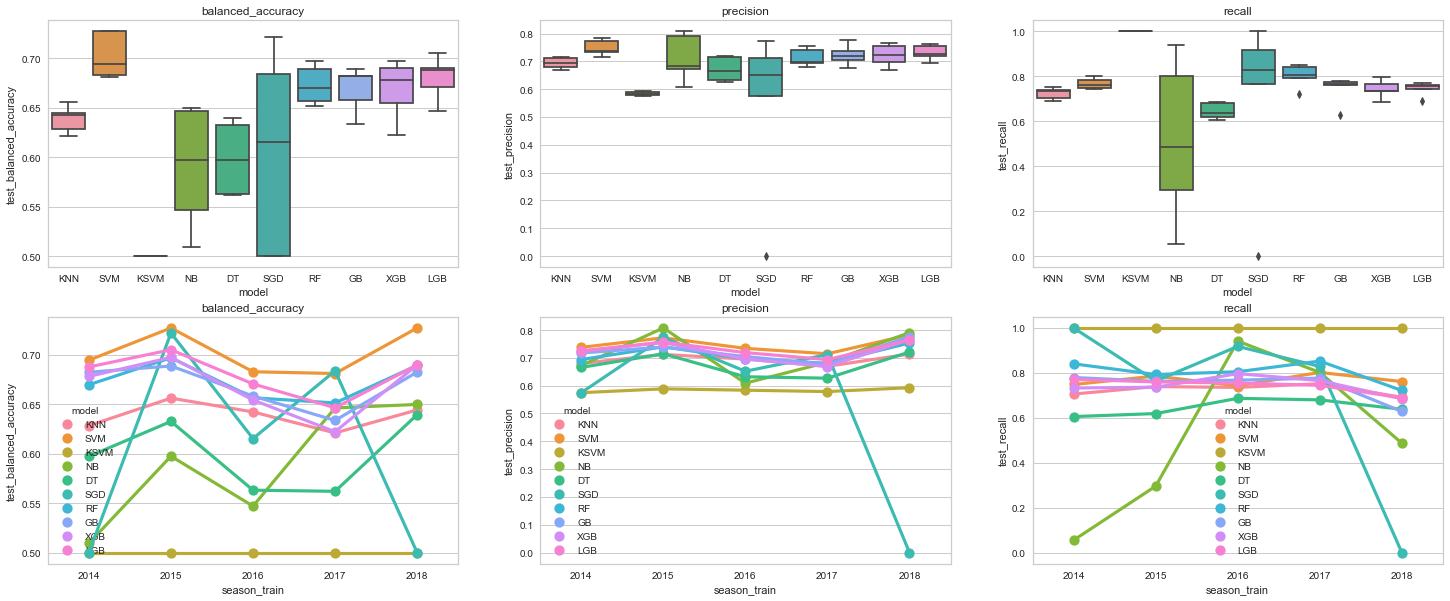

In [12]:
results_df = exp.plot_experiment_results(experiment_name, results)
results_df.to_pickle(f"./experiments/{experiment_name}_exp.pkl")

Se observa lo siguiente:

- KSVM: siempre predice true o 1, por esta razon en los graficos podemos ver como para la metrica test_balanced_accuracy mantiene un rendimiento constante de 50%, y sin embargo para la metrica test_recall observamos como muestra tambien un rendimiento constante de 100% acierto, dado que el modelo nunca produce falsos negativos.

- Se observa como los algoritmos mas estables

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

### Experiment using StandardScaler

In [13]:
experiment_name = "scaled_data"

In [14]:
train_splits = seasons_size - 1
tscv = TimeSeriesSplit(n_splits=train_splits, max_train_size=1230)
X, y = train.X_y_values(df, model_config.X_for_scale, model_config.y_columns[-1:])
names, results = exp.run_experiment(experiment_name, df, models, tscv, train_splits, X, y, True)

Running experiment scaled_data
KNN
balanced_accuracy: 0.6754298375027097 - 0.01928777264171135
precision: 0.7231651247616558 - 0.025607151150325504
recall: 0.7673378201765793 - 0.04960421218990976
f1: 0.6873606496684703 - 0.015398827658807769
roc_auc: 0.6754298375027097 - 0.01928777264171131
SVM
balanced_accuracy: 0.6531617747424621 - 0.07899025362583809
precision: 0.7101763458443928 - 0.06225331844944021
recall: 0.8020006303000047 - 0.099097445715703
f1: 0.6487460297251312 - 0.10526995497904437
roc_auc: 0.6531617747424618 - 0.07899025362583809
KSVM
balanced_accuracy: 0.5 - 0.0
precision: 0.583739837398374 - 0.006442800896311838
recall: 1.0 - 0.0
f1: 0.43033425003538295 - 0.007748156942408034
roc_auc: 0.5 - 0.0
NB
balanced_accuracy: 0.5590693577229467 - 0.05445478110777875
precision: 0.6731920003478212 - 0.07472579176197316
recall: 0.6185823199078793 - 0.3769352404986154
f1: 0.4901341801595132 - 0.11401163468392114
roc_auc: 0.5590693577229467 - 0.054454781107778766
DT
balanced_accuracy

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF
balanced_accuracy: 0.672157524455305 - 0.01738358898991774
precision: 0.711476113768685 - 0.025276926904617428
recall: 0.8039928850864069 - 0.036965374435656
f1: 0.686671169733639 - 0.015904204292415458
roc_auc: 0.672157524455305 - 0.01738358898991772
GB
balanced_accuracy: 0.6600822404895346 - 0.02364539455991302
precision: 0.7070619734664065 - 0.02718436163970956
recall: 0.776905899431968 - 0.045761254608547595
f1: 0.6737491992485507 - 0.019460481184579183
roc_auc: 0.6600822404895345 - 0.023645394559912943
XGB
balanced_accuracy: 0.6662570033878855 - 0.027521875847614594
precision: 0.71696848618972 - 0.028088611500583536
recall: 0.747989654833211 - 0.030973084344041016
f1: 0.6779144302949291 - 0.026560345619116292
roc_auc: 0.6662570033878855 - 0.027521875847614636
LGB
balanced_accuracy: 0.6851188491240783 - 0.019733629287963083
precision: 0.7347148215571792 - 0.02481062014172969
recall: 0.7509461477884398 - 0.010711774876539966
f1: 0.6950581412467338 - 0.01865787996320996
roc_auc: 0

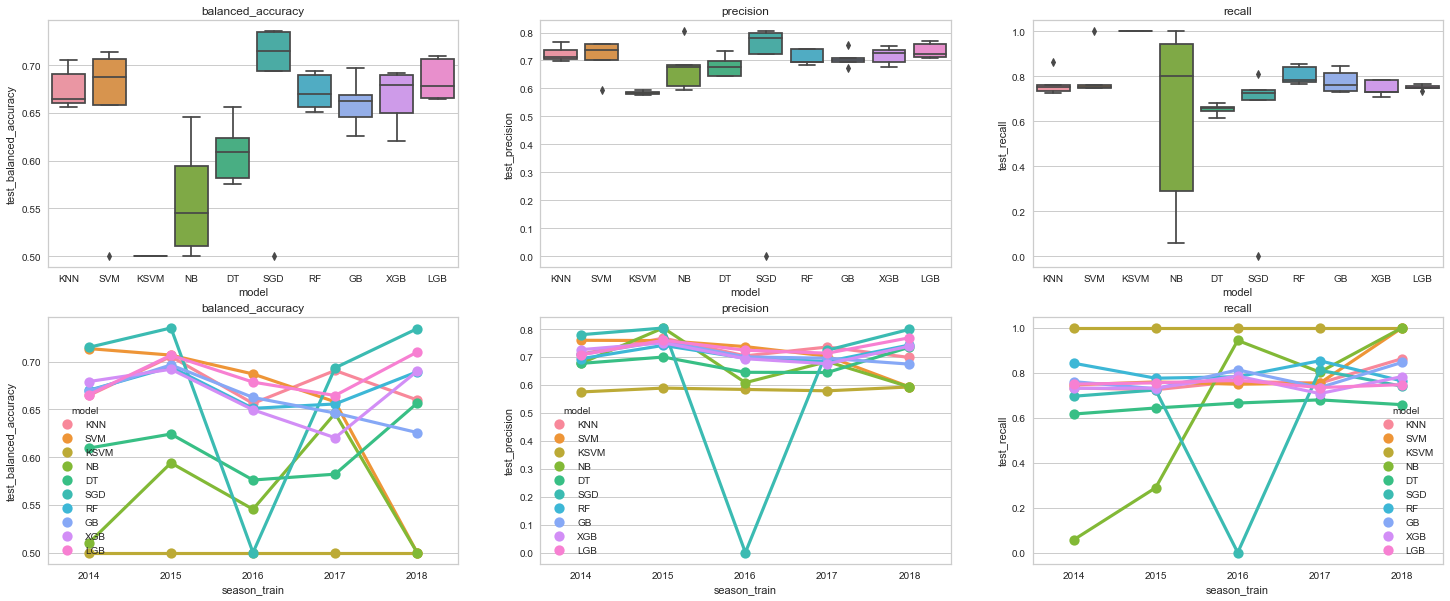

In [16]:
results_df = exp.plot_experiment_results(experiment_name, results)
results_df.to_pickle(f"./experiments/{experiment_name}_exp.pkl")

A partir de realizar los siguientes experimentos:

- Entrenar los modelos sin escalar los valores numericos.

### Experiment using 2 seasons

Usando TimeSeriesSplit visualizaremos como sera dividido el modelo

In [17]:
experiment_name = "2_seasons"

In [18]:
train_splits = seasons_size - 4
tscv = TimeSeriesSplit(n_splits=train_splits, max_train_size=2460)
X, y = train.X_y_values(df, model_config.X_ordinal_cols + model_config.X_num_cols, model_config.y_columns[-1:])
print(len(X))
for train_index, test_index in tscv.split(X=X):
    print("TRAIN:", train_index, "TEST:", test_index)
    
names, results = exp.run_experiment(experiment_name, df, models, tscv, train_splits, X, y)

7380
TRAIN: [   0    1    2 ... 2457 2458 2459] TEST: [2460 2461 2462 ... 4917 4918 4919]
TRAIN: [2460 2461 2462 ... 4917 4918 4919] TEST: [4920 4921 4922 ... 7377 7378 7379]
Running experiment 2_seasons
KNN
balanced_accuracy: 0.6496744452376364 - 0.009012191146560378
precision: 0.7036871158354128 - 0.010889155351027857
recall: 0.7426332653487475 - 0.01170400043890002
f1: 0.66314526459466 - 0.007144106124186256
roc_auc: 0.6496744452376364 - 0.009012191146560489
SVM
balanced_accuracy: 0.7080086988220764 - 0.005254505252160202
precision: 0.7536408029651273 - 0.01845561777994209
recall: 0.7797595386159827 - 0.0467498298781186
f1: 0.7183284051939709 - 0.00043714989890719647
roc_auc: 0.7080086988220764 - 0.0052545052521601465
KSVM
balanced_accuracy: 0.5 - 0.0
precision: 0.5859756097560975 - 0.00020325203252030688
recall: 1.0 - 0.0
f1: 0.4330046812078715 - 0.0002448927025267833
roc_auc: 0.5 - 0.0
NB
balanced_accuracy: 0.5550701576475352 - 0.036805305022524715
precision: 0.6707800724486822 - 

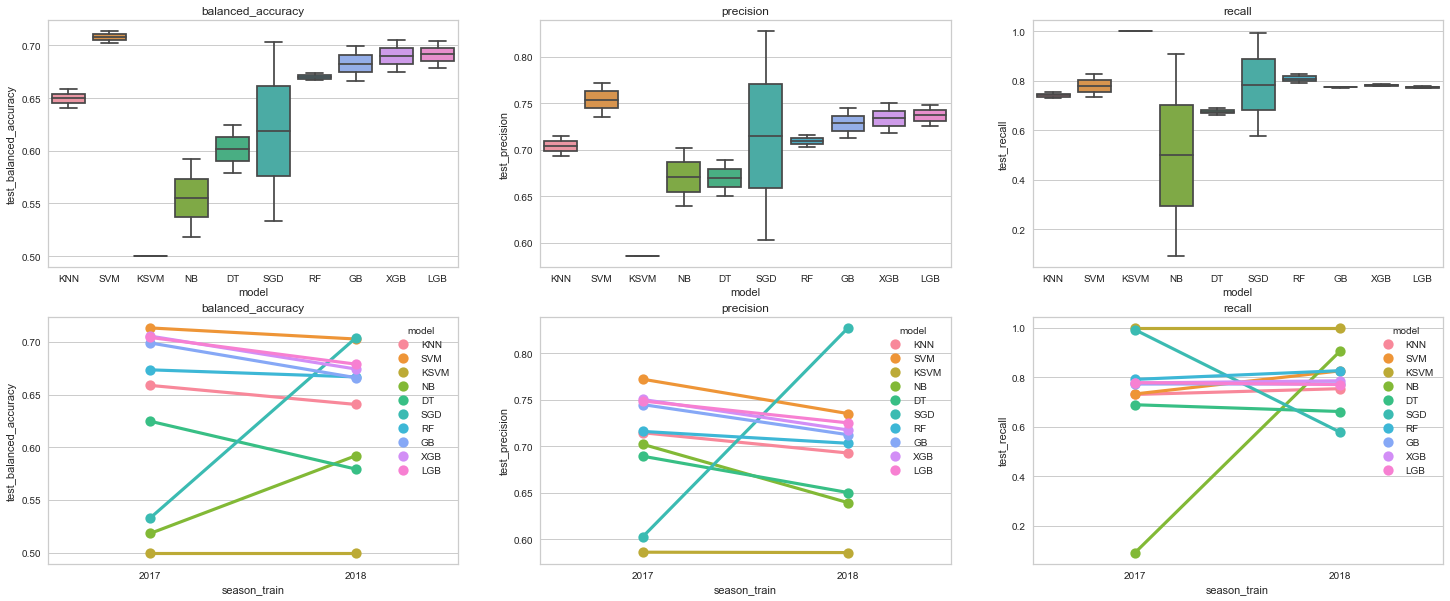

In [19]:
results_df = exp.plot_experiment_results(experiment_name, results)
results_df.to_pickle(f"./experiments/{experiment_name}_exp.pkl")

### Experiment quarter split

In [20]:
experiment_name = "quarter_pred"

In [21]:
result_size = (seasons_size - 1) * 4
tscv = utils.CustomTimeSeriesSplit(df)
X, y = train.X_y_values(df, model_config.X_ordinal_cols + model_config.X_num_cols, model_config.y_columns[-1:])
#for train_index, test_index in tscv.split(1):
    #print("TRAIN:", len(train_index), "TEST:", len(test_index))
    #print("TRAIN:", train_index[:5], "TEST:", test_index[:5])
    
names, results = exp.run_experiment(experiment_name
                                    , df
                                    , models
                                    , list(tscv.split(1))
                                    , (result_size, seasons[-(seasons_size - 1):])
                                    , X, y
                                    , False
                                    , (True, [0, 0.25, 0.5, 0.75]))

Running experiment quarter_pred
KNN
balanced_accuracy: 0.6428449860337861 - 0.03819899545036296
precision: 0.6990137784524788 - 0.03496791631005727
recall: 0.7230976690998571 - 0.0485843348305836
f1: 0.6545794477462147 - 0.03589670075522597
roc_auc: 0.6428449860337861 - 0.038198995450362955
SVM
balanced_accuracy: 0.6988972813315297 - 0.08004878330479265
precision: 0.7461979230884308 - 0.06670927902665139
recall: 0.7845938277297103 - 0.06486604470986622
f1: 0.710976943361177 - 0.07465347867646392
roc_auc: 0.6988972813315297 - 0.08004878330479265
KSVM
balanced_accuracy: 0.5 - 0.0
precision: 0.5837281610897247 - 0.024208529414714505
recall: 1.0 - 0.0
f1: 0.43059740049412937 - 0.02891846539640743
roc_auc: 0.5 - 0.0
NB
balanced_accuracy: 0.6117160692048044 - 0.06487544322948632
precision: 0.7062261440639872 - 0.19013179534915517
recall: 0.5503548413923325 - 0.2970126382668474
f1: 0.5639593585787838 - 0.14169532217283626
roc_auc: 0.6117160692048044 - 0.06487544322948632


/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DT
balanced_accuracy: 0.606572262002103 - 0.0549715617611509
precision: 0.6777691899349689 - 0.05264389183821738
recall: 0.6565189532083572 - 0.05946616686776243
f1: 0.6151892384245408 - 0.05104776195217991
roc_auc: 0.6065722620021028 - 0.05497156176115091


/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SGD
balanced_accuracy: 0.590806381624647 - 0.09075669039118213
precision: 0.6828908452190192 - 0.20909407417171336
recall: 0.7236136526902374 - 0.3396372861352773
f1: 0.533893191425029 - 0.1470521851980942
roc_auc: 0.590806381624647 - 0.09075669039118213
RF
balanced_accuracy: 0.6774931172470299 - 0.04494840437484193
precision: 0.7164805302826471 - 0.03797212457933601
recall: 0.8063180678659432 - 0.04290889980483369
f1: 0.6930807979014323 - 0.04128567874582318
roc_auc: 0.6774931172470299 - 0.04494840437484192
GB
balanced_accuracy: 0.675776488576046 - 0.045775170854097484
precision: 0.7255525295024757 - 0.04148723154869737
recall: 0.7565429914115012 - 0.05520084612595656
f1: 0.6872665601187525 - 0.04291001529741138
roc_auc: 0.675776488576046 - 0.0457751708540975
XGB
balanced_accuracy: 0.6761689702059548 - 0.053678780346590196
precision: 0.727442108633824 - 0.045649995418274567
recall: 0.7567903527712299 - 0.05248427159080585
f1: 0.6881281659983107 - 0.05026557349121051
roc_auc: 0.6761689

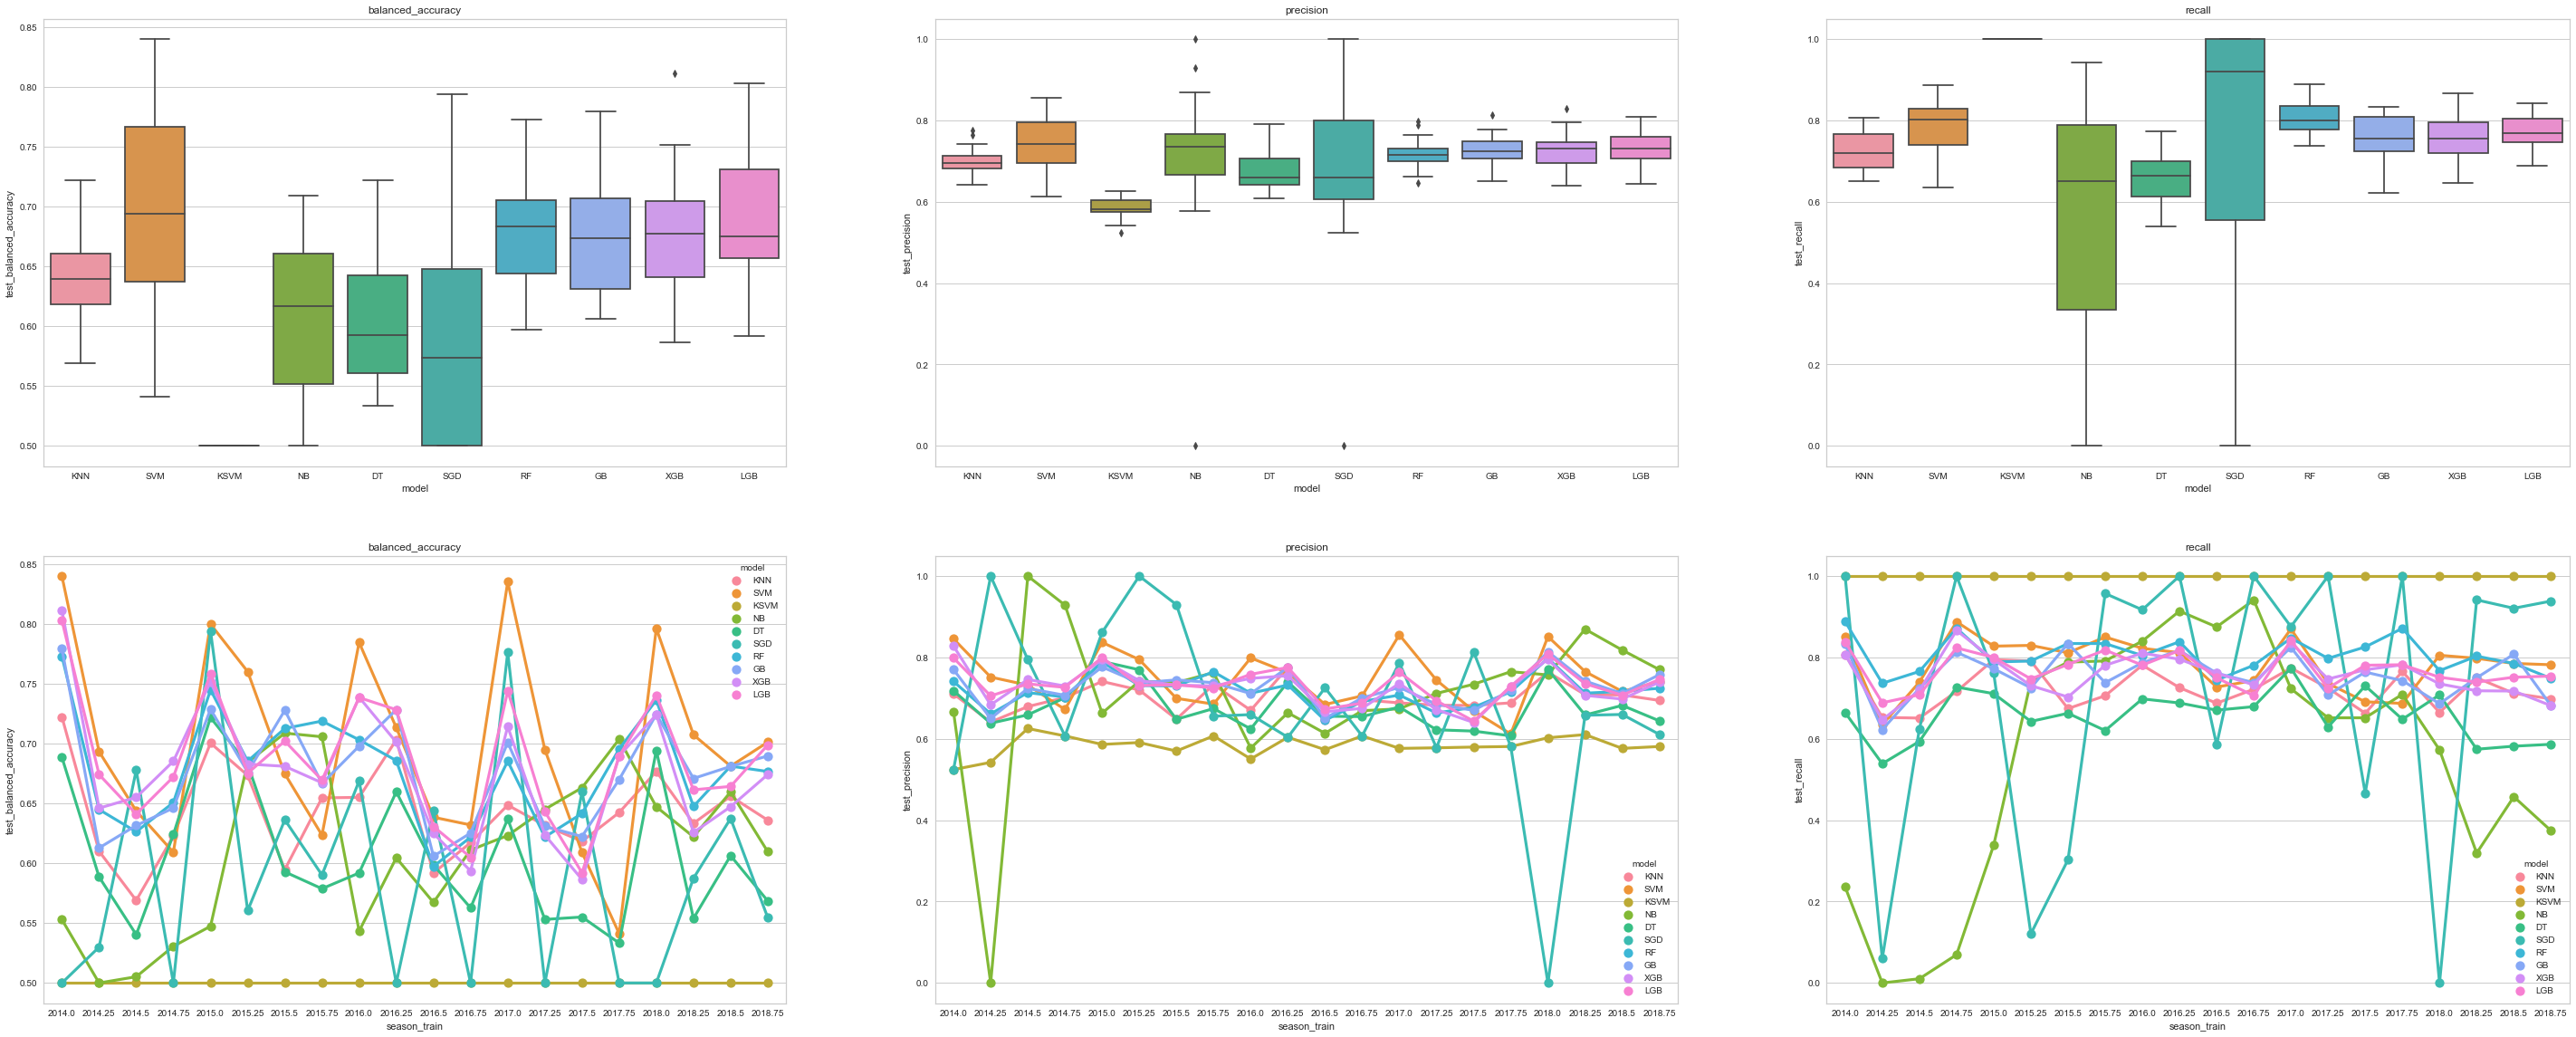

In [22]:
results_df = exp.plot_experiment_results(experiment_name, results, figsize=(50, 20))
results_df.to_pickle(f"./experiments/{experiment_name}_exp.pkl")

## Comparing experiments

In [23]:
exp_df = pd.DataFrame(exp.exp_results)

In [24]:
#show_qgrid(exp_df)
qgrid_widget = qgrid.show_grid(exp_df, show_toolbar=True , grid_options={'forceFitColumns': False, 'defaultColumnWidth': 200})
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [ ]:
exp_df.groupby(by=['exp_name']).mean().sort_values(by=["balanced_accuracy_mean"], ascending=False)

Se observa:

    - El 

## Test a specific model

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

SVC(random_state=0)

Confusion Matrix
[[  0 523]
 [  0 707]]
Test Set: 1230
Accuracy = 57.47967479674797 %
balanced_accuracy_score: 0.5
recall_score: 1.0


Text(0.5, 1.05, 'Confusion matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

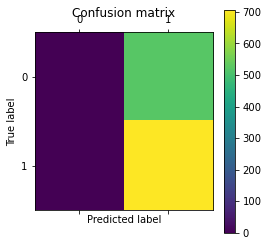

SVC(random_state=0)

Confusion Matrix
[[  0 506]
 [  0 724]]
Test Set: 1230
Accuracy = 58.86178861788618 %
balanced_accuracy_score: 0.5
recall_score: 1.0


Text(0.5, 1.05, 'Confusion matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

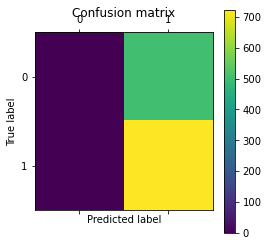

SVC(random_state=0)

Confusion Matrix
[[  0 512]
 [  0 718]]
Test Set: 1230
Accuracy = 58.3739837398374 %
balanced_accuracy_score: 0.5
recall_score: 1.0


Text(0.5, 1.05, 'Confusion matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

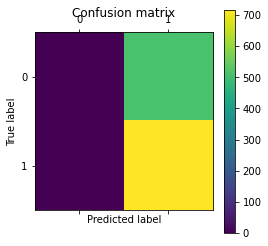

SVC(random_state=0)

Confusion Matrix
[[  0 518]
 [  0 712]]
Test Set: 1230
Accuracy = 57.886178861788615 %
balanced_accuracy_score: 0.5
recall_score: 1.0


Text(0.5, 1.05, 'Confusion matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

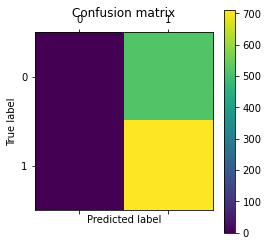

SVC(random_state=0)

Confusion Matrix
[[  0 501]
 [  0 729]]
Test Set: 1230
Accuracy = 59.26829268292683 %
balanced_accuracy_score: 0.5
recall_score: 1.0


Text(0.5, 1.05, 'Confusion matrix')

Text(0, 0.5, 'True label')

Text(0.5, 0, 'Predicted label')

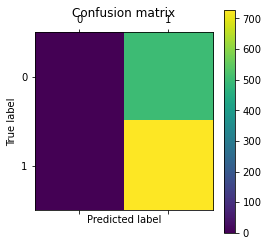

In [89]:
tscv = TimeSeriesSplit(n_splits=len(df.SEASON.unique())-1, max_train_size=1230)
X, y = train.X_y_values(df, model_config.X_for_scale, model_config.y_columns[-1:])
model = SVC(kernel = 'rbf', random_state=0)
for train_index, test_index in tscv.split(X=X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    model.fit(X[train_index], y[train_index].ravel())
    predictions = model.predict(X=X[test_index])
    percentage = model.score(X[test_index], y[test_index].ravel())
    res = confusion_matrix(y[test_index], predictions)
    print("Confusion Matrix")
    print(res)
    print(f"Test Set: {len(X[test_index])}")
    print(f"Accuracy = {percentage*100} %")
    print(f"balanced_accuracy_score: {balanced_accuracy_score(y[test_index], predictions)}")
    print(f"recall_score: {recall_score(y[test_index], predictions)}")
    # Show confusion matrix in a separate window
    plt.matshow(res)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [90]:
results_pred = np.concatenate((predictions.reshape(len(predictions),1), y[test_index].reshape(len(y[test_index]),1)),1)
test_pred = pd.DataFrame(results_pred, columns=["pred", "true"])